In [228]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb
import matplotlib.pyplot as plt

In [187]:
data = pd.read_pickle("./cleaned_data.pkl")
data

,id,price,location,type
2,1101106,105000.0,gozo,apartment
4,1101108,260000.0,pietà,flat
9,1100419,149000.0,attard,apartment
10,1100420,680000.0,attard,villa
11,1100421,278000.0,attard,apartment
...,...,...,...,...
714,1169520,260000.0,sliema,penthouse
716,1169522,580000.0,st julians,villa
718,1169524,170000.0,st julians,apartment
722,1169481,150000.0,mosta,apartment


In [188]:
# Considering the 10 most popular locations for the linear regressor
locations = data.location.value_counts()[:10] 
locations

sliema        7326
gozo          6308
mosta         4774
st julians    4152
mellieħa      3546
qawra         2985
attard        2974
birkirkara    2802
msida         2558
naxxar        2476
Name: location, dtype: int64

In [189]:
# Get price and location for the above locations
data = data[(data["location"]=="sliema")|(data["location"]=="gozo") 
           |(data["location"]=="mosta")|(data["location"]=="st julians")
           |(data["location"]=="mellieha")|(data["location"]=="qawra")
           |(data["location"]=="attard")|(data["location"]=="birkirkara")
           |(data["location"]=="msida")|(data["location"]=="naxxar")]

data    

,id,price,location,type
2,1101106,105000.0,gozo,apartment
9,1100419,149000.0,attard,apartment
10,1100420,680000.0,attard,villa
11,1100421,278000.0,attard,apartment
12,1100422,205000.0,attard,apartment
...,...,...,...,...
714,1169520,260000.0,sliema,penthouse
716,1169522,580000.0,st julians,villa
718,1169524,170000.0,st julians,apartment
722,1169481,150000.0,mosta,apartment


In [190]:
# train_test_split from sklearn to split data into training and testing sets. param
# random_state.

In [191]:
# data = data.drop(columns=["id", "type"]) # Drop columns that are irrelevant to the predictor
data = data.drop(columns=["id"]) 
data = data.sample(frac=1) # Shuffle the dataframe to ensure rows are random
data

,price,location,type
396,198000.0,qawra,apartment
43,265000.0,gozo,apartment
177,268000.0,qawra,apartment
13,285000.0,attard,apartment
34,450000.0,mosta,penthouse
...,...,...,...
762,189000.0,attard,apartment
479,340000.0,sliema,house
36,579500.0,attard,house
117,128150.0,attard,maisonette


In [192]:
# Generate dummy variables for location, dropping one of the columns to avoid the 
# "dummy variable trap". Therefore, I will obtain 9 columns instead of 10.
withdummies = pd.get_dummies(data=data, columns=["location"], drop_first=True)
withdummies

,price,type,location_birkirkara,location_gozo,location_mosta,location_msida,location_naxxar,location_qawra,location_sliema,location_st julians
396,198000.0,apartment,0,0,0,0,0,1,0,0
43,265000.0,apartment,0,1,0,0,0,0,0,0
177,268000.0,apartment,0,0,0,0,0,1,0,0
13,285000.0,apartment,0,0,0,0,0,0,0,0
34,450000.0,penthouse,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
762,189000.0,apartment,0,0,0,0,0,0,0,0
479,340000.0,house,0,0,0,0,0,0,1,0
36,579500.0,house,0,0,0,0,0,0,0,0
117,128150.0,maisonette,0,0,0,0,0,0,0,0


In [193]:
# Obtain dataframe of independent variables
X = withdummies.drop(["price", "type"], axis="columns")
X

,location_birkirkara,location_gozo,location_mosta,location_msida,location_naxxar,location_qawra,location_sliema,location_st julians
396,0,0,0,0,0,1,0,0
43,0,1,0,0,0,0,0,0
177,0,0,0,0,0,1,0,0
13,0,0,0,0,0,0,0,0
34,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
762,0,0,0,0,0,0,0,0
479,0,0,0,0,0,0,1,0
36,0,0,0,0,0,0,0,0
117,0,0,0,0,0,0,0,0


In [229]:
# Extract training and testing sets in the ratio 8:2
X_train, X_test, y_train, y_test = train_test_split(X, withdummies["price"], test_size=0.2, 
                                                    shuffle=True)

In [230]:
# Create and train a linear regressor using training data
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [231]:
y_true = y_test
y_pred = model.predict(X_test)
r2_score(y_true, y_pred)

-0.00013844204586899167

/home/quentin/anaconda3/envs/cps3235/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

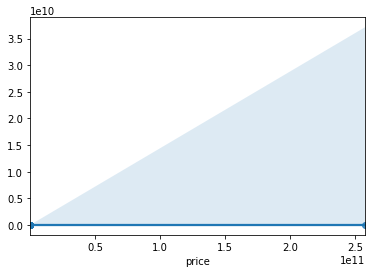

In [232]:
# plt.scatter(X_test, y_test,  color='black')
# plt.plot(X_test, y_test, color='blue', linewidth=3)
sb.regplot(y_test,y_pred)